In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Representación de datos

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


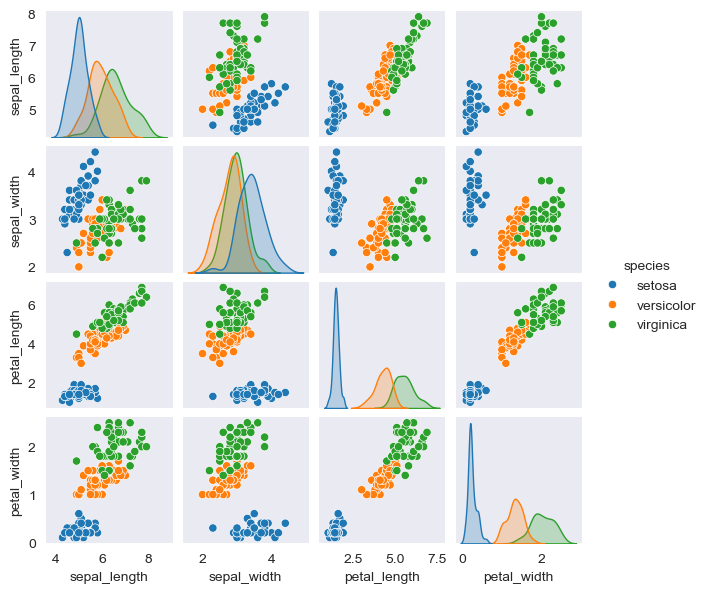

In [3]:
sns.set_style("dark")
ax = sns.pairplot(iris, hue='species', height=1.5)

In [4]:
from sklearn.model_selection import train_test_split
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)
print( Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(112, 4) (38, 4) (112,) (38,)


# Aprendizaje supervisado: regresión

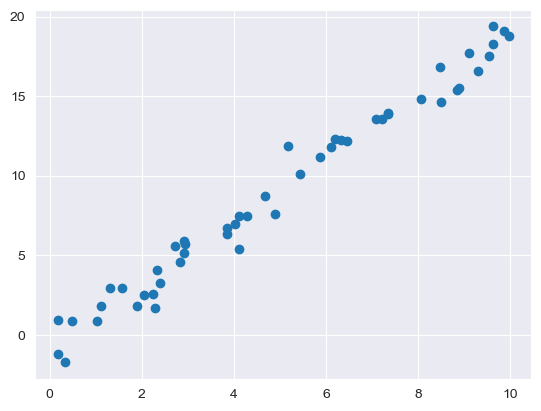

In [5]:
sns.set_style("darkgrid")
# Datos sintéticos aproximados a la recta y = 2x - 1
rng = np.random.RandomState(62)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [6]:
#1. Seleccionar modelo
from sklearn.linear_model import LinearRegression

#2. Elegir hiperparámetros
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [7]:
# 3. Matriz de características
X = x[:, np.newaxis]
print(X.shape)

(50, 1)


In [8]:
# 4. Entrenar el modelo con los datos
model.fit(X, y)
# In Scikit-Learn, by convention all model parameters that were learned during the fit process have trailing underscores
print(model.coef_) # pendiente de la recta
print(model.intercept_) # cruce con eje y

[1.98220176]
-0.8628971129336716


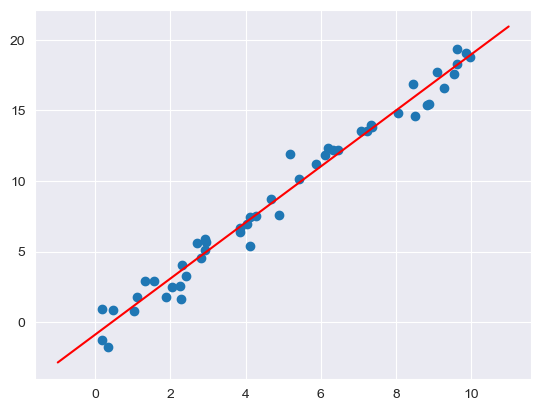

In [9]:
# Predecir categorías
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit,color='red');

# Aprendizaje supervisado: clasificación

In [10]:
# Reutilizaremos el DataFrame iris en adelante
from sklearn.naive_bayes import GaussianNB # 1. Elegir modelo
model = GaussianNB() # 2. Instanciar el modelo (no hay hiperparámetros)
model.fit(Xtrain, ytrain) # 3. Entrenar con los datos
y_model = model.predict(Xtest) # 4. Predecir nuevos datos

In [11]:
y_model

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Aprendizaje no supervisado: dimensionalidad

In [13]:
# describir un conjunto de datos en términos de nuevas variables (componentes) no correlacionadas.
from sklearn.decomposition import PCA # 1. Elegir el modelo
model = PCA(n_components=2) # 2. Instanciar el modelo y determinar hiperparámetros
model.fit(X_iris) # 3. Ajustar a los datos. No se especifica 'y'.
X_2D = model.transform(X_iris) # 4. Tranformar la información a 2D (para dos componentes)
print(model.components_)
print(model.explained_variance_ratio_)
print(X_iris.shape)
print(X_2D.shape)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[0.92461872 0.05306648]
(150, 4)
(150, 2)


In [16]:
# Graficar utilizando nuevos ejes
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


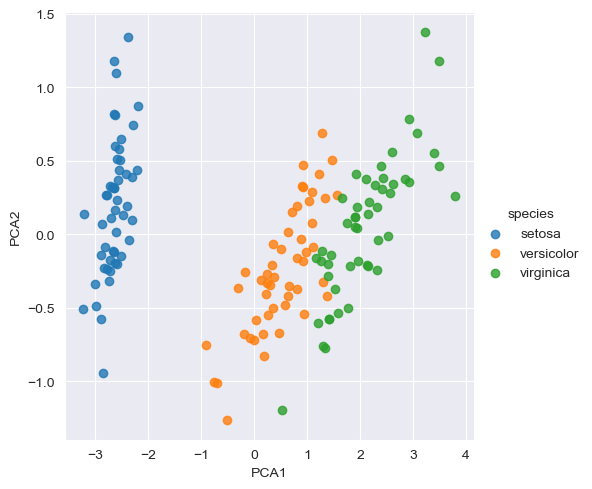

In [15]:
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

# Aprendizaje no supervisado: agrupamiento

In [ ]:
from sklearn.mixture import GaussianMixture # 1. Escoger modelo
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Instanciar con hiperparámetros
model.fit(X_iris) # 3. Ajustar a los datos
y_gmm = model.predict(X_iris) # 4. Determinar etiquetas (predecir)

In [ ]:
iris['cluster'] = y_gmm
_ = sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

# Validación equivocada

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtrain)

from sklearn.metrics import accuracy_score
accuracy_score(ytrain, y_model)

# Validación correcta: conjuntos de reserva

In [ ]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X_iris, y_iris, random_state=3515, train_size=0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

# Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_iris, y_iris, cv=5)

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_iris, y_iris, cv=LeaveOneOut())
scores.mean()

# Seleccionar el modelo adecuado

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# The purpose of the pipeline is to assemble several steps that can be cross-validated together
# while setting different parameters.
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=1):
# randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
    
X, y = make_data(40)
plt.scatter(X.ravel(), y, color='black')

In [ ]:
# Puntos de prueba para graficar los polinomios obtenidos por regresión
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f'degree={degree}')
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='red')
plt.axis(lim)

# Curvas de aprendizaje

In [ ]:
# Generar más puntos
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name='polynomialfeatures__degree', param_range=degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed',label='previous training score')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed', label='previous validation score')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [ ]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1),color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed', label='score of convergence')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# Búsqueda de cuadrícula

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21), 'linearregression__fit_intercept': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);
grid.best_params_

In [ ]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='red');
plt.axis(lim)